# PFun CMA Model -- Modular Demos

In [137]:
import pfun_cma_model as pfun

## Instantiate the model

In [138]:
import json
cma = pfun.CMASleepWakeModel()
cma.to_dict()

{'_params': {'t': None,
  'N': 24,
  'd': 0.0,
  'taup': 1.0,
  'taug': 1.0,
  'B': 0.05,
  'Cm': 0.0,
  'toff': 0.0,
  'tM': [7.0, 11.0, 17.5],
  'seed': None,
  'eps': 1e-18,
  'lb': [-12.0, 0.5, 0.1, 0.0, 0.0, -3.0],
  'ub': [14.0, 3.0, 3.0, 1.0, 2.0, 3.0],
  'bounded_param_keys': ['d', 'taup', 'taug', 'B', 'Cm', 'toff'],
  'midbound': [0.0, 1.0, 1.0, 0.05, 0.0, 0.0],
  'bounded_param_descriptions': ['Time zone offset (hours)',
   'Photoperiod length',
   'Glucose response time constant',
   'Glucose Bias constant',
   'Cortisol temporal sensitivity coefficient',
   'Solar noon offset (latitude)'],
  'bounds': {'lb': [-12.0, 0.5, 0.1, 0.0, 0.0, -3.0],
   'ub': [14.0, 3.0, 3.0, 1.0, 2.0, 3.0],
   'keep_feasible': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}},
 '_DEFAULT_PARAMS_MODEL': {'t': None,
  'N': 24,
  'd': 0.0,
  'taup': 1.0,
  'taug': 1.0,
  'B': 0.05,
  'Cm': 0.0,
  'toff': 0.0,
  'tM': [7.0, 11.0, 17.5],
  'seed': None,
  'eps': 1e-18,
  'lb': [-12.0, 0.5, 0.1, 0.0, 0.0, -3.0],
  'ub':

## Run the model (24 time bins)

In [139]:
cma.run()

,t,c,m,a,I_S,I_E,L,g_0,g_1,g_2,G,is_meal
0 days 00:00:00,0.000000,0.083045,8.535534e-01,0.250723,0.152953,0.038349,1.106922e-11,0.100000,0.100000,0.100000,0.300000,False
0 days 01:02:36.521739132,1.043478,0.038009,9.358302e-01,0.253929,0.083503,0.021204,3.004811e-08,0.100000,0.100000,0.100000,0.300000,False
0 days 02:05:13.043478260,2.086957,0.021421,9.857497e-01,0.262773,0.038896,0.010221,1.144779e-05,0.100000,0.100000,0.100000,0.300000,False
0 days 03:07:49.565217392,3.130435,0.018138,9.970919e-01,0.280742,0.028649,0.008043,8.732045e-04,0.100000,0.100000,0.100000,0.300000,False
0 days 04:10:26.086956520,4.173913,0.040626,9.241525e-01,0.310228,0.094228,0.029232,1.822252e-02,0.100000,0.100000,0.100000,0.300000,False
0 days 05:13:02.608695652,5.217391,0.393812,5.992821e-01,0.349067,0.328120,0.114536,1.325419e-01,0.100000,0.100000,0.100000,0.300000,False
0 days 06:15:39.130434781,6.260870,0.927952,1.703964e-01,0.405627,0.621286,0.252011,4.097470e-01,0.100000,0.100000,0.100000,0.300000,False
0 days 07:18:15.652173913,7.304348,0.990231,1.831830e-02,0.470787,0.754478,0.355198,7.051652e-01,0.849737,0.100000,0.100000,1.049737,True
0 days 08:20:52.173913045,8.347826,0.945383,7.943753e-04,0.540836,0.781791,0.422821,8.892609e-01,0.441766,0.100000,0.100000,0.641766,False
0 days 09:23:28.695652173,9.391304,0.895967,1.087617e-05,0.611056,0.793917,0.485128,9.710631e-01,0.175599,0.100000,0.100000,0.375599,False


## Load & Process an example dataset

(raw) sample data
|      |   Unnamed: 0.1 |   Unnamed: 0 |   user_id | ts_utc              | ts_local            |   is_sg |   sg |   is_fl |   meal_tag | tag_bef_meal   | tag_after_meal   | tag_after_snack   | tag_seems_high   | tag_seems_low   |
|-----:|---------------:|-------------:|----------:|:--------------------|:--------------------|--------:|-----:|--------:|-----------:|:---------------|:-----------------|:------------------|:-----------------|:----------------|
| 2874 |           2874 |         2874 |  10130489 | 2021-01-28 07:08:28 | 2021-01-27 23:08:28 |       1 |  140 |       0 |        nan | True           | False            | False             | True             | False           |
| 2875 |           2875 |         2875 |  10130489 | 2021-01-28 07:13:28 | 2021-01-27 23:13:28 |       1 |  142 |       0 |        nan | True           | False            | False             | True             | False           |
| 2876 |           2876 |         2876 |  10130489 | 2021-01-2

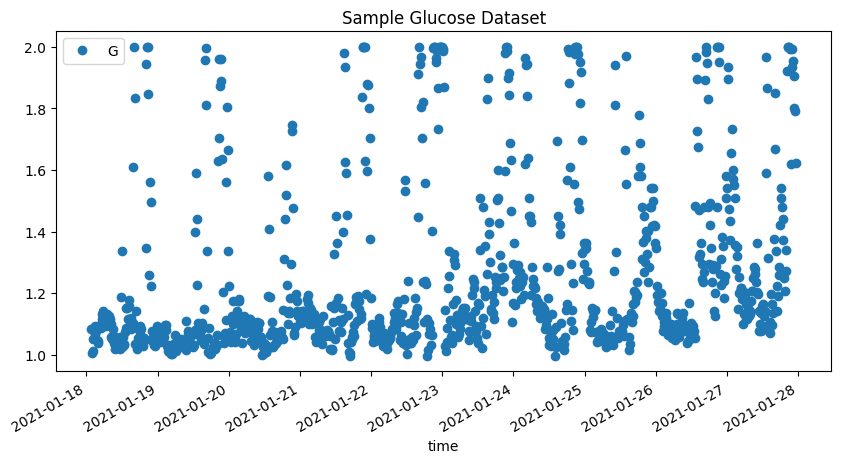

In [140]:
from pfun_cma_model.engine.fit import fit_model
from pfun_cma_model.engine.data_utils import format_data
from pfun_cma_model.misc.pathdefs import PFunDataPaths

df = PFunDataPaths().read_sample_data()

print('(raw) sample data')
print(df.tail().to_markdown())
print()

print('formatted sample data')
df_formatted = format_data(df)
print(df_formatted.tail().to_markdown())
print()

ax = df_formatted.plot(
    x='time',
    y=['G'],
    title='Sample Glucose Dataset',
    figsize=(10, 5),
    linestyle='',
    marker='o',
)

#### Zoom on Last day (raw data)

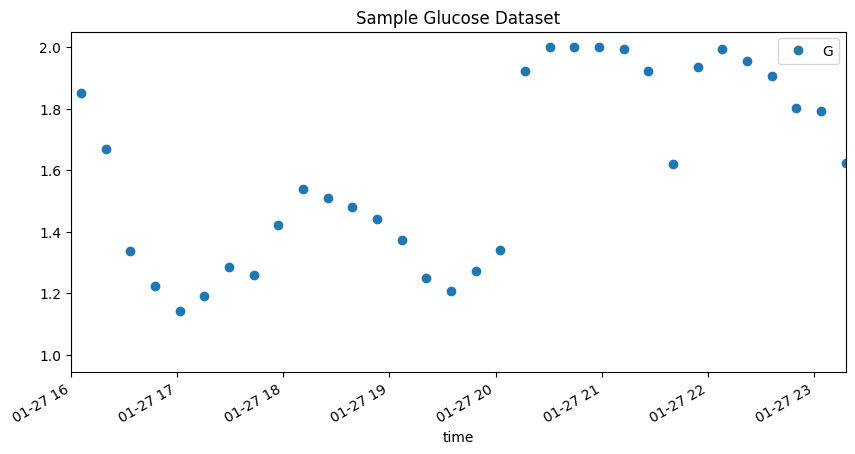

In [141]:
ax.set_xlim('2021-01-27 16:00:00', df_formatted['time'].max())
ax.get_figure()

## Fit the model to sample data

### Raw fit result (solution)

In [142]:
print('model fit result')
result = fit_model(
    df,
    tm_freq='1h',
    curve_fit_kwds={
        'ftol': 1e-18,
        'xtol': 1e-18,
        'method': 'L-BFGS-B',
        })
print(result.soln.shape)
print(result)
print()

model fit result
(1024, 13)
soln=                                   t         c         m         a       I_S  \
0 days 00:05:50.499999999   0.097361  0.220266  0.507321  0.250461  0.457238   
0 days 00:08:12.000000001   0.136667  0.218075  0.512196  0.250489  0.453012   
0 days 00:08:17.999999998   0.138333  0.217982  0.512403  0.250490  0.452834   
0 days 00:10:54.500000001   0.181806  0.215544  0.517768  0.250522  0.448190   
0 days 00:13:12             0.220000  0.213390  0.522458  0.250551  0.444136   
...                              ...       ...       ...       ...       ...   
0 days 23:48:15.333333332  23.804259  0.205308  0.028399  0.281180  0.925232   
0 days 23:48:23.666666666  23.806574  0.205254  0.028498  0.281123  0.925149   
0 days 23:53:11.666666666  23.886574  0.203344  0.032090  0.279191  0.922103   
0 days 23:53:20.666666666  23.889074  0.203284  0.032208  0.279132  0.922003   
0 days 23:55:48            23.930000  0.202285  0.034196  0.278180  0.920305   

      

### Raw fitted parameters

**Displays `{ param_name: type(param_value) }` for all fitted parameters in the model result.**

In [143]:
import pandas as pd
raw_params = result.cma.params

print('types of raw parameters')
params_types = {k: ( str(type(v)), repr(v)[:100] + '...' ) for k, v in raw_params.items()}

df_params_types = pd.DataFrame.from_dict(
    params_types, orient='index', columns=['type', 'repr_head'])
df_params_types.sort_values(by='type', inplace=False)

types of raw parameters


,type,repr_head
N,<class 'NoneType'>,None...
seed,<class 'NoneType'>,None...
bounds,<class 'dict'>,"{'lb': [-12.0, 0.5, 0.1, 0.0, 0.0, -3.0], 'ub'..."
eps,<class 'float'>,1e-18...
midbound,<class 'list'>,"[0.0, 1.0, 1.0, 0.05, 0.0, 0.0]..."
lb,<class 'list'>,"[-12.0, 0.5, 0.1, 0.0, 0.0, -3.0]..."
ub,<class 'list'>,"[14.0, 3.0, 3.0, 1.0, 2.0, 3.0]..."
d,<class 'numpy.float64'>,3.017512479572737...
taup,<class 'numpy.float64'>,3.0...
taug,<class 'numpy.float64'>,0.21976050176801604...


## CMAModelParams: Pretty Markdown Table

**Note the qualtitative descriptions! (e.g., 'High')**

In [144]:
from pfun_cma_model import CMAModelParams

params = result.cma.bounded_params
print(params.generate_markdown_table())

Parameter    Type       Value    Default    Lower Bound    Upper Bound  Description
-----------  ------  --------  ---------  -------------  -------------  --------------------------------------------------
d            float   3.01751        0             -12               14  Time zone offset (hours) (High)
taup         float   3              1               0.5              3  Photoperiod length (Very High)
taug         float   0.219761       1               0.1              3  Glucose response time constant (Very Low)
B            float   0.154993       0.05            0                1  Glucose Bias constant (High)
Cm           float   0              0               0                2  Cortisol temporal sensitivity coefficient (Normal)
toff         float   0              0              -3                3  Solar noon offset (latitude) (Normal)


### Fitted Solution Plotted

<Axes: title={'center': 'Model Fit Result'}, xlabel='t'>

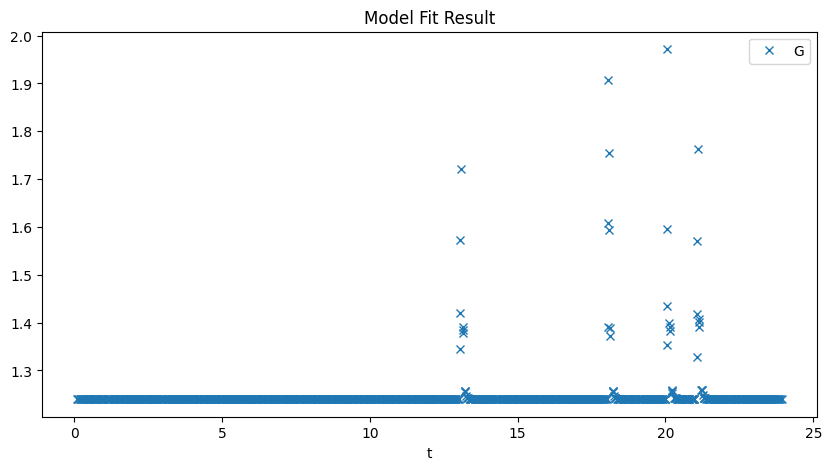

In [145]:
result.soln.plot(
    x='t',
    y=['G'],
    title='Model Fit Result',
    figsize=(10, 5),
    linestyle='',
    marker='x',
)

#### Zoomed on dinner estimate (fitted)

<Axes: xlabel='t'>

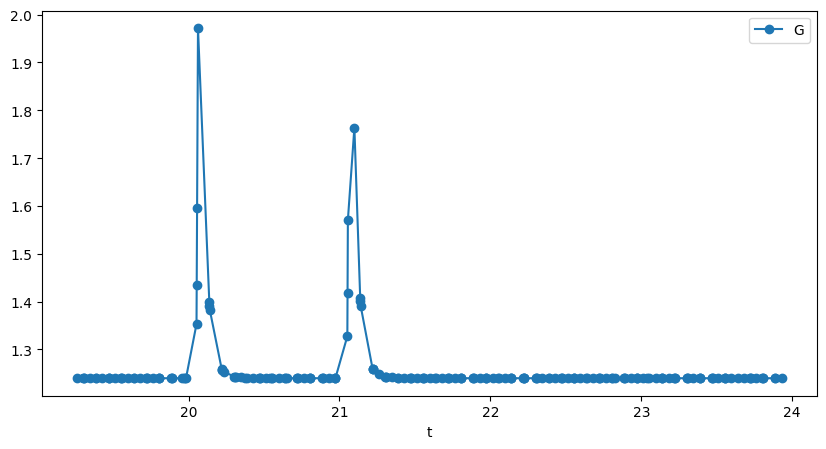

In [146]:
result.soln.iloc[-200:, :].plot(x='t', y=['G'], figsize=(10, 5), linestyle='-', marker='o')

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: xlabel='Time (24-hours)'>, <Axes: xlabel='Time (24-hours)'>],
       dtype=object))

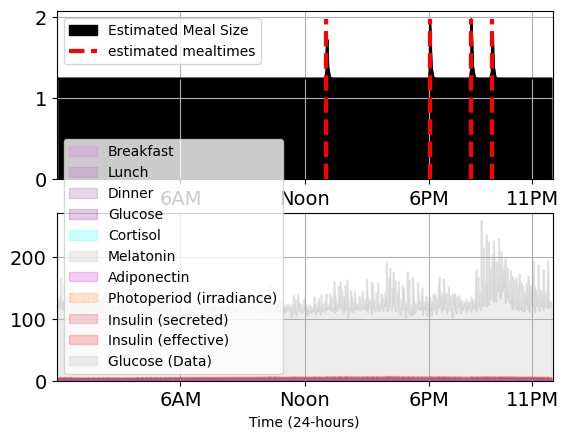

In [147]:
from pfun_cma_model.engine.cma_plot import CMAPlotConfig

cma_plot = CMAPlotConfig()

cma_plot.plot_model_results(
    result.formatted_data,
    result.soln,
    as_blob=False,
    separate2subplots=False,
)

(<Figure size 640x480 with 12 Axes>,
 array([<Axes: xlabel='Time (24-hours)'>, <Axes: xlabel='Time (24-hours)'>,
        <Axes: xlabel='Time (24-hours)'>, <Axes: xlabel='Time (24-hours)'>,
        <Axes: xlabel='Time (24-hours)'>, <Axes: xlabel='Time (24-hours)'>,
        <Axes: xlabel='Time (24-hours)'>, <Axes: xlabel='Time (24-hours)'>,
        <Axes: xlabel='Time (24-hours)'>, <Axes: xlabel='Time (24-hours)'>,
        <Axes: xlabel='Time (24-hours)'>, <Axes: xlabel='Time (24-hours)'>],
       dtype=object))

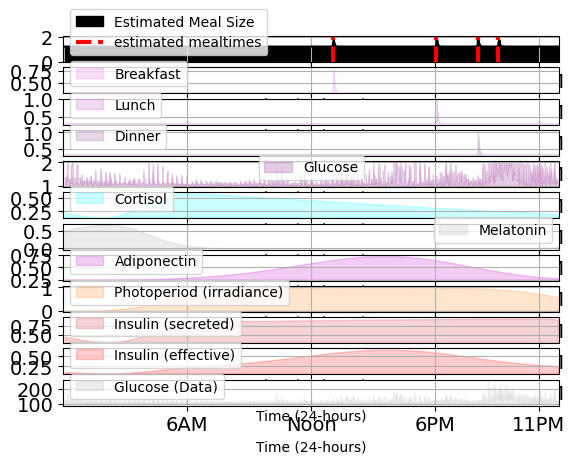

In [148]:
from pfun_cma_model.engine.cma_plot import CMAPlotConfig

cma_plot = CMAPlotConfig()

cma_plot.plot_model_results(
    result.formatted_data,
    result.soln,
    as_blob=False,
    separate2subplots=True,
)

## Experiments with N=...

In [149]:
for n in [12, 24, 288, 1024]:
    print(f'Running model with {n} time points')
    soln = pfun.CMASleepWakeModel(N=n).run()
    print(soln.shape)
    print()

Running model with 12 time points
(12, 12)

Running model with 24 time points
(24, 12)

Running model with 288 time points
(288, 12)

Running model with 1024 time points
(1024, 12)



# CMA Model Parameters (Curve fitting)

Experiments
-----------